# 1. Hypersphere
$n$차원에서의 구를 초구(hypershpere)라고 한다. 반지름이 $r$인 2차권 구의 부피(면적)은 $S_2=\pi r^2$, 3차원은 $S_3=\frac{4}{3} \pi r^3$이다. 이를 확장하여 4차원, 5차원 구의 부피를 몬테카를로 방법을 이용하여 추측해보자.

$n$차원 구의 부피는 $S_n = C_n r^n$이다.
따라서 반지름이 1인 구를 생각하면 $S_n=C_n$과 같다.
몬테카를로 방법을 이용한 2차원 원의 면적 문제를 응용하여 3, 4, 5차원에서 $C_n$의 근사값을 구하여라.

In [73]:
import numpy as np
import random


def s_circle_limit5n(n,m):#n 시행할 횟수 m 차원수
    count=0
    add=0
    for i in range(n):
        
        v1=random.random()
        add=v1*v1
        
        if m>1:
            v2=random.random()
            add+=v2*v2
        if m>2:
            v3=random.random()
            add+=v3*v3
        if m>3:
            v4=random.random()
            add+=v4*v4
        if m>4:
            v5=random.random()
            add+=v5*v5
            
        if add<1:
            count+=1
            
            
    return (2**m)*count/n


구부피 r=1일때 

n차원:부피값(근사)

0차원:1

1차원:2

2차원:3.141

3차원:4.189

4차원:4.935

5차원:5.264

자료 출처:https://ko.wikipedia.org/wiki/%EB%8B%A8%EC%9C%84%EA%B5%AC

In [74]:
s_circle_limit5n(100000,0)

1.0

In [75]:
s_circle_limit5n(100000,1)

2.0

In [76]:
s_circle_limit5n(100000,2)

3.13348

In [77]:
s_circle_limit5n(100000,3)

4.18592

In [78]:
s_circle_limit5n(100000,4)

4.95632

In [79]:
s_circle_limit5n(100000,5)

5.26336

# 2. Particles in a box
1차원 무한히 깊은 퍼텐셜 상자 (길이 $L$) 안에 있는 양자 입자를 생각해 봅시다. 가능한 에너지 상태는 다음과 같습니다.

$$ E_n = \frac{\pi^2 \hbar^2}{2m L^2} n^2.$$
상호작용하지 않는 입자 총 $N=1000$개가 박스 안에 들어있다고 가정합시다. 또한 문제를 간단히 하기 위해 $2m=\hbar=1$, $L=\pi$로 가정합시다. 그러면$$ E_n = n^2.$$

열적 요동에 의해 입자들은 각자 에너지 상태가 바뀔 수 있습니다. 단 열적 요동이 아주 크지는 않아서 상태는 한 단계씩만 변화한다고 가정해봅시다. 그렇다면 무작위로 고른 하나의 입자의 상태가 바뀌어 에너지 고유값이 한 단계 증가했다면 그 때 에너지 차이는 다음과 같습니다.$$ \Delta E = (n+1)^2- (n)^2 = ( 2 n +1)$$비슷한 방식으로 에너지가 감소했다면 에너지 차이는 다음과 같습니다.$$ \Delta E =( -2 n +1)$$

초기에 모든 입자가 바닥상태(n=1)에 존재하고 있었다고 가정하고 메트로폴리스 알고리즘을 이용하여 온도($\beta$)를 바꾸어가면서

 1.총 에너지 $\sum_{i=1}^{N} E_n = \sum_i n_i^2$

 2.에너지에 따른 입자의 분포를 측정해 봅시다. (즉 볼츠만 분포를 따르는지)

구체적인 알고리즘은 다음과 같습니다.

1.$N$개의 입자 중에 무작위로 하나를 고른다. 고른 입자를 $i$라고 부르자.

2.입자 $i$의 상태와 에너지를 확인한다. 이를 각각 $n_i$와 $E_i$이라고 하자.

3.고른 입자 $i$의 나중 에너지 상태를 선택한다. 즉, $1/2$ 확률로 $n_i+1$, 나머지 $1/2$ 확률로 $n_i-1$을 선택한다. 단 입자 $i$가 바닥상태 (에너지가 $E_1$인 상태)에 존재했다면 $1/2$ 확률로 바닥상태에 그대로 머무르고 $1/2$ 확률로 에너지가 $E_2$인 상태로 바꾸기를 시도한다.

4.입자의 상태를 변화했을 때 에너지를 확인하자. 이를 $E_f$라고 하고 에너지 차이를 구한다. $\Delta E=E_f-E_i$

5.만약 $\Delta E \le 0$이면 1의 확률로(즉 항상) 상태를 $i$에서 $f$로 바꾼다.

6.만약 $\Delta E > 0$이면 $e^{-\beta \Delta E}$의 확률로 상태를 $f$로 바꾼다. 즉 0과 1사이의 랜덤넘버를 하나 구해서 이 값이 앞의 확률보다 낮으면 상태를 바꾼다.

7.이 과정을 반복한다.

In [305]:
import random
import numpy as np
import matplotlib.pyplot as plt 


def fE(n,b,n2):#(입자수,b,카운팅 가능한 에너지 레벨 수)
    states = np.ones(n)
    a=np.arange(1,1001,1)
    for t in range(n*100):
        i=random.randint(0,n-1)
        
        ni=states[i]
        
        pickchange=random.randint(0,1)

        if pickchange==1:
                nf=states[i]+1

        else:
    
            if(states[i]>1):
                nf=states[i]-1
            else:
                nf=states[i]

        DE = nf*nf-ni*ni
        if DE<=0:
            states[i]=nf 
        elif random.random()<np.exp(-b*DE):
            states[i]=nf
            
    en=np.zeros(n2)
    
    for t in range (n2):
        for z in range(n):
            if t==states[z]:
                en[t]+=1
        
    return en

    



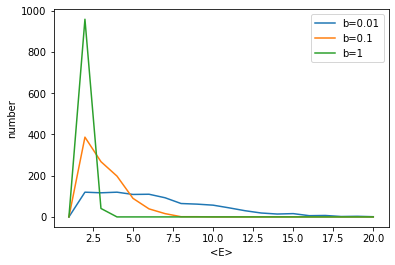

In [316]:

e=np.arange(1,20+1,1)
plt.xlabel('<E>')
plt.ylabel('number')
plt.plot(e,fE(1000,0.01,20),label="b=0.01");
plt.plot(e,fE(1000,0.1,20),label="b=0.1");
plt.plot(e,fE(1000,1,20),label="b=1");

plt.legend()
plt.show()

온도가 낮아질수록 낮은 에너지로 몰리고 높아질수록 볼츠만 분포처럼 에너지 분포가 고루 퍼지는 모습을 볼수 있다.